In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 1 -> En función de la región, analizar como cada construcción está destruida.
# 1 -> Region que más sufrió.

In [2]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [3]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,...,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,...,0,0,0,0,0,0,0,0,0,0


In [4]:
daño_segun_ubicacion = values.loc[:,['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]
daño_segun_ubicacion.head()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id
0,802906,6,487,12198
1,28830,8,900,2812
2,94947,21,363,8973
3,590882,22,418,10694
4,201944,11,131,1488


In [5]:
daño_segun_ubicacion = daño_segun_ubicacion.merge(labels, left_on = 'building_id', right_on = 'building_id', how = 'inner')
daño_segun_ubicacion.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,damage_grade
0,802906,6,487,12198,3
1,28830,8,900,2812,2
2,94947,21,363,8973,3
3,590882,22,418,10694,2
4,201944,11,131,1488,3


In [6]:
daño_segun_ubicacion = daño_segun_ubicacion.drop(columns= 'building_id')
daño_segun_ubicacion.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,damage_grade
0,6,487,12198,3
1,8,900,2812,2
2,21,363,8973,3
3,22,418,10694,2
4,11,131,1488,3


<AxesSubplot:title={'center':'Densidad de tipo de daño general'}, xlabel='Grado de daño', ylabel='Density'>

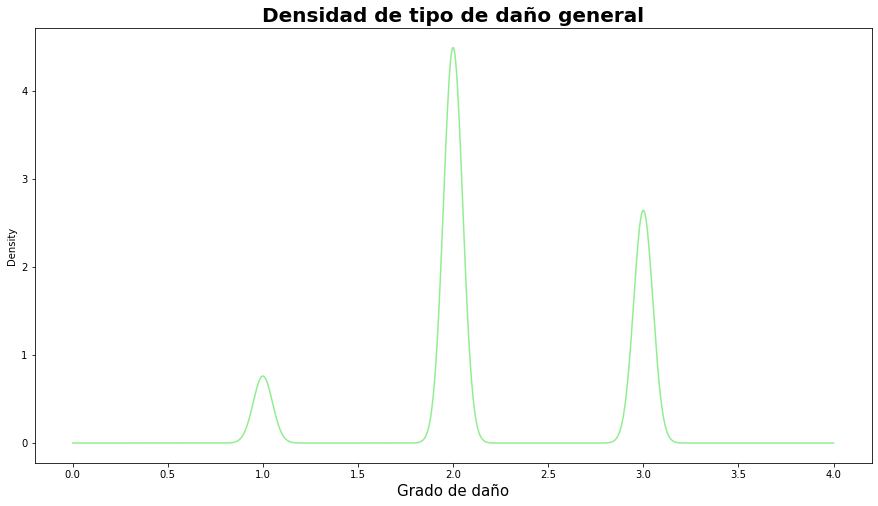

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Densidad de tipo de daño general', fontsize =20, fontweight = 'bold')
ax.set_xlabel('Grado de daño', fontsize =15)
daño_segun_ubicacion['damage_grade'].plot.kde(figsize=(15,8), color='lightgreen')
#la frecuencia de tipo de daño identifica cual es el grado de daño que mas aparece en base a todos los casos.

In [8]:
daño_ubicacion_1 = daño_segun_ubicacion.pivot_table(columns='geo_level_1_id', values='damage_grade')
daño_ubicacion_2 = daño_segun_ubicacion.pivot_table(columns='geo_level_2_id', values='damage_grade')
daño_ubicacion_3 = daño_segun_ubicacion.pivot_table(columns='geo_level_3_id', values='damage_grade')


In [9]:
daño_ubicacion_1 = daño_ubicacion_1.T
daño_ubicacion_2 = daño_ubicacion_2.T
daño_ubicacion_3 = daño_ubicacion_3.T

In [10]:
daño_ubicacion_1

,damage_grade
geo_level_1_id,
0,2.065320
1,1.960755
2,2.162191
3,2.331565
4,2.162136
5,1.919703
6,2.161724
7,2.297726
8,2.485273


Text(0, 0.5, 'Grado de daño')

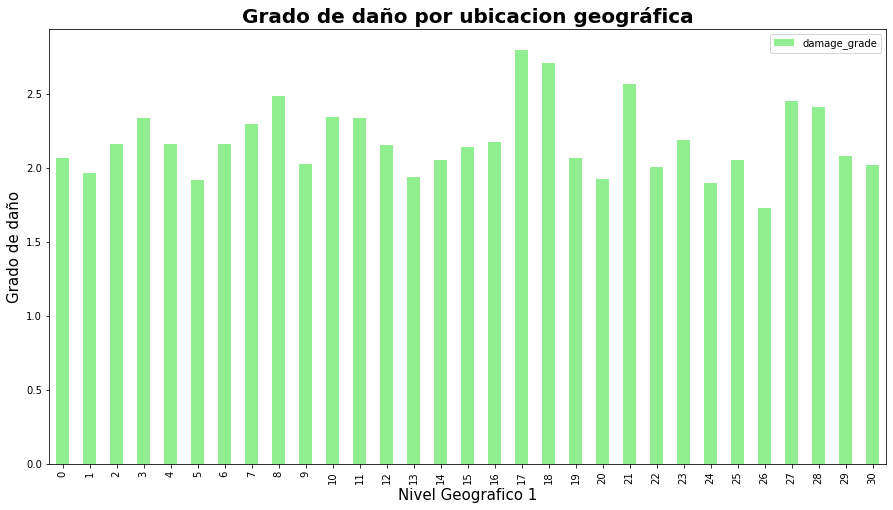

In [11]:
daño_ubicacion_1.plot.bar(figsize=(15, 8),color='lightgreen')
plt.title('Grado de daño por ubicacion geográfica',fontsize =20, fontweight = 'bold')
plt.xlabel('Nivel Geografico 1',fontsize =15)
plt.ylabel('Grado de daño',fontsize =15)
#el nivel 1 engloba a los niveles 2 y 3, siendo estos mas especificos, el nivel 1 es como ver
#los datos de un pais en vez de los de cada provincia, determinamos grado de daño por nivel 1

<AxesSubplot:title={'center':'Densidad de grado de daño por ubicacion geografica'}, xlabel='Grado de daño', ylabel='Density'>

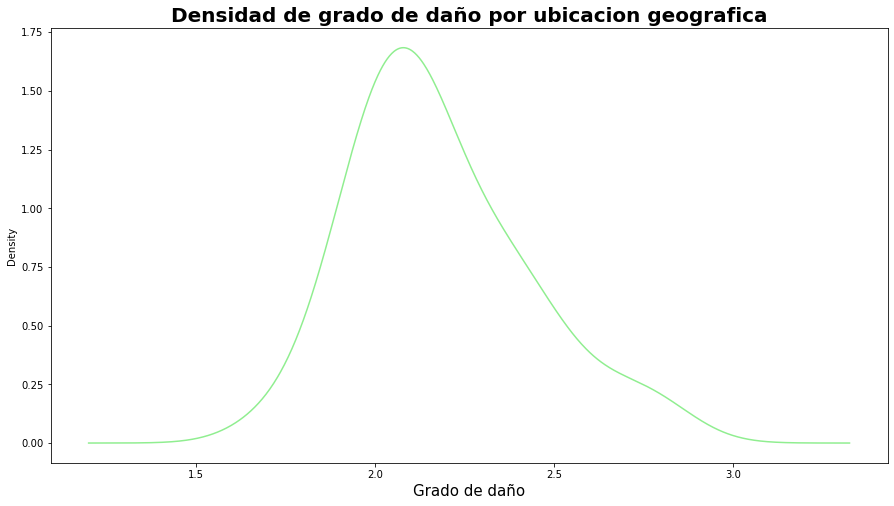

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Densidad de grado de daño por ubicacion geografica', fontsize =20, fontweight = 'bold')
ax.set_xlabel('Grado de daño', fontsize =15)
daño_ubicacion_1['damage_grade'].plot.kde(figsize=(15,8), color='lightgreen')
#la densisdad del daño significa cual es el daño que mas ocurre en base a la totalidad de ocurrencias

In [13]:
daño_segun_ubicacion['contador'] = 1
daño = daño_segun_ubicacion.groupby(['damage_grade']).agg({'contador':['count']})
daño.head()

,contador
,count
damage_grade,
1,25124
2,148259
3,87218


In [14]:
lvl0=daño.columns.get_level_values(0)
lvl1=daño.columns.get_level_values(1)
daño.columns = lvl0 + '_' + lvl1
daño.head()

,contador_count
damage_grade,
1,25124
2,148259
3,87218


In [15]:
daño.head()

,contador_count
damage_grade,
1,25124
2,148259
3,87218


In [16]:
daño_pivot = daño.pivot_table(columns='damage_grade', values = 'contador_count')
daño_pivot.head()

damage_grade,1,2,3
contador_count,25124,148259,87218


Text(0.5, 0, 'Grado de daño')

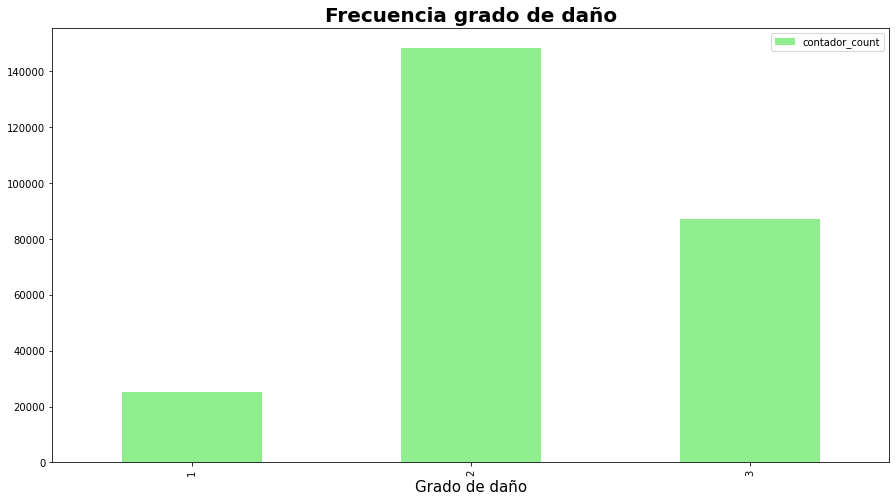

In [17]:
daño.plot.bar(figsize=(15,8), color='lightgreen')
plt.title('Frecuencia grado de daño', fontsize =20, fontweight = 'bold')
plt.xlabel('Grado de daño', fontsize =15)
#este grafico determina la cantidad de ocurrencias con cada tipo de daño, acompaña al primer grafico
#que determina la densisdad (frecuencia) con la que los tipos de daño ocurren